In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import torch

iris = load_iris()

encoder = OneHotEncoder(sparse=False)
x_train = iris.data
y_train =encoder.fit_transform(iris.target.reshape(-1, 1))
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()


In [4]:
import torch

data_federation = [[x_train, y_train], [x_train, y_train]]

in_layer = 4
out_layer = 3
optimizer = "SGD"
criterion = "MSELoss"
starting_model = torch.rand(in_layer, out_layer)
epochs = 1000
learn_rate = 0.1

In [7]:
from helper_libs.shared.models.LogisticRegression import LogisticRegression


model = LogisticRegression(in_layer, out_layer)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

In [8]:
from torch.autograd import Variable

for epoch in range(epochs):

    inputs = Variable(x_train)
    labels = Variable(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.29362067580223083
epoch 1, loss 0.28880229592323303
epoch 2, loss 0.2851462662220001
epoch 3, loss 0.28207552433013916
epoch 4, loss 0.2792598307132721
epoch 5, loss 0.27650606632232666
epoch 6, loss 0.2736959755420685
epoch 7, loss 0.270754337310791
epoch 8, loss 0.2676351070404053
epoch 9, loss 0.2643183171749115
epoch 10, loss 0.2608121335506439
epoch 11, loss 0.25715768337249756
epoch 12, loss 0.2534315586090088
epoch 13, loss 0.24973972141742706
epoch 14, loss 0.24619941413402557
epoch 15, loss 0.24291092157363892
epoch 16, loss 0.23993146419525146
epoch 17, loss 0.23726442456245422
epoch 18, loss 0.23486869037151337
epoch 19, loss 0.23268039524555206
epoch 20, loss 0.23063331842422485
epoch 21, loss 0.22867174446582794
epoch 22, loss 0.22675462067127228
epoch 23, loss 0.22485460340976715
epoch 24, loss 0.22295542061328888
epoch 25, loss 0.22104868292808533
epoch 26, loss 0.21913184225559235
epoch 27, loss 0.21720628440380096
epoch 28, loss 0.21527661383152008
epoc

In [9]:
predicted = model(x_train)

In [10]:
predictions = []
for prediction in predicted:
        predictions.append(prediction.argmax())
predictions

labels = []
for y in y_train:
        labels.append(y.argmax())

column_a = []
for x in x_train:
    column_a.append(x[0])
    

/tmp/ipykernel_3115/1793160935.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', color='red', label='Predictions]', alpha=0.3)


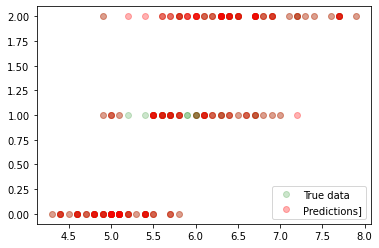

In [12]:
import matplotlib.pyplot as plt

plt.plot(column_a, labels, 'go', label='True data', alpha=0.2)
plt.legend(loc='best')
plt.plot(column_a, predictions, 'go', color='red', label='Predictions]', alpha=0.3)
plt.legend(loc='best')
plt.show()